In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

: 

In [53]:
data = pd.read_csv('churn.csv')
data.head()
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [54]:
data = data.drop(['customerID'], axis=1)

In [55]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [56]:
# data encoding 

from sklearn.preprocessing import LabelEncoder

for col in data.columns:
    if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
    
     


In [57]:
# featches selection 

x = data.drop(['Churn'], axis=1)
y = data['Churn']

y.value_counts()



Churn
0    5174
1    1869
Name: count, dtype: int64

In [59]:
x.head()
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [60]:
from sklearn.ensemble import ExtraTreesClassifier

model_etc = ExtraTreesClassifier()
model_etc.fit(x, y)

feat_importance = pd.Series(model_etc.feature_importances_, index=x.columns)

# select top ten featchers 

top_feat = feat_importance.nlargest(10)
top_feat

tenure             0.153924
TotalCharges       0.138222
MonthlyCharges     0.137239
Contract           0.082786
PaymentMethod      0.064268
TechSupport        0.048093
OnlineSecurity     0.046378
gender             0.037616
InternetService    0.034192
OnlineBackup       0.033073
dtype: float64

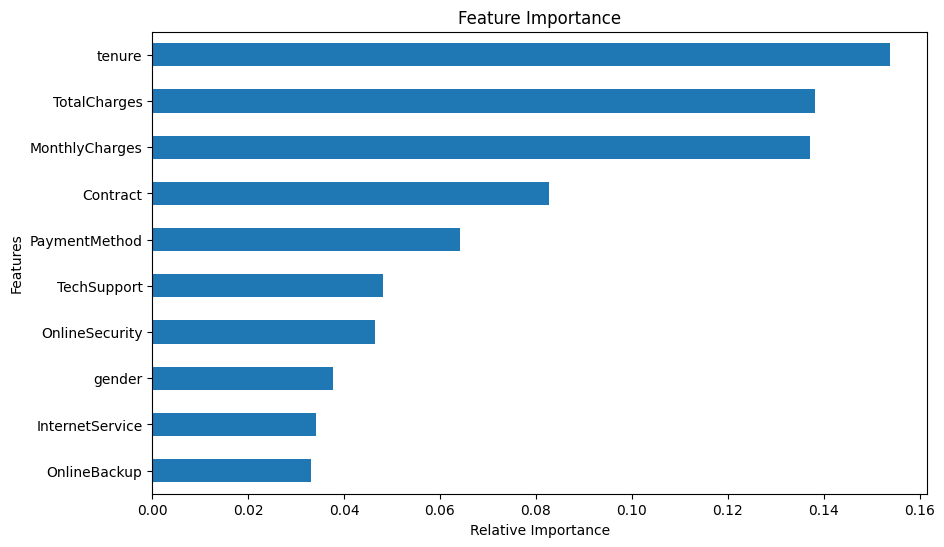

In [61]:
plt.figure(figsize=(10,6))
top_feat.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

In [62]:
top_feat = top_feat.index.tolist()
top_feat

['tenure',
 'TotalCharges',
 'MonthlyCharges',
 'Contract',
 'PaymentMethod',
 'TechSupport',
 'OnlineSecurity',
 'gender',
 'InternetService',
 'OnlineBackup']

In [63]:
x = x[top_feat]
x.head()



,tenure,TotalCharges,MonthlyCharges,Contract,PaymentMethod,TechSupport,OnlineSecurity,gender,InternetService,OnlineBackup
0,1,2505,29.85,0,2,0,0,0,0,2
1,34,1466,56.95,1,3,0,2,1,0,0
2,2,157,53.85,0,3,0,2,1,0,2
3,45,1400,42.30,1,0,2,2,1,0,0
4,2,925,70.70,0,2,0,0,0,1,0


In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-1.27744458, -0.39860759, -1.16032292, ..., -1.00955867,
        -1.18323364,  1.24254983],
       [ 0.06632742, -0.94876238, -0.25962894, ...,  0.99053183,
        -1.18323364, -1.02991925],
       [-1.23672422, -1.64188328, -0.36266036, ...,  0.99053183,
        -1.18323364,  1.24254983],
       ...,
       [-0.87024095, -0.13968008, -1.1686319 , ..., -1.00955867,
        -1.18323364, -1.02991925],
       [-1.15528349, -0.31653445,  0.32033821, ...,  0.99053183,
         0.17225018, -1.02991925],
       [ 1.36937906,  1.13801338,  1.35896134, ...,  0.99053183,
         0.17225018, -1.02991925]], shape=(7043, 10))

In [77]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape

(5634, 10)

In [89]:
# model building 
from tensorflow.keras.callbacks import EarlyStopping

model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    callbacks=[early_stop]
)

e:\Ai\Deep_Learning\ANN\venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7428 - loss: 0.5268
Epoch 2/50
100/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7850 - loss: 0.4400

e:\Ai\Deep_Learning\ANN\venv\Lib\site-packages\keras\src\callbacks\early_stopping.py:99: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7891 - loss: 0.4380
Epoch 3/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7922 - loss: 0.4292
Epoch 4/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7952 - loss: 0.4258
Epoch 5/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7939 - loss: 0.4245
Epoch 6/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7964 - loss: 0.4220
Epoch 7/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7993 - loss: 0.4206
Epoch 8/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7969 - loss: 0.4194
Epoch 9/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8000 - loss: 0.4189
Epoch 10/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7980 - loss: 0.4182
Epoch 11/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7996 - loss: 0.4160
Epoch 12/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8042 - loss: 0.4154
Epoch 13/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accurac

In [90]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,077 (12.02 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,052 (8.02 KB)

In [95]:
y_pred = model.predict(x_test)
y_pred[:5]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.8031112 ],
       [0.01943522],
       [0.00644447],
       [0.8758775 ],
       [0.00751034]], dtype=float32)

In [96]:
y_test[:5]

185     1
2715    0
3825    0
1807    1
132     0
Name: Churn, dtype: int64

In [93]:
model.evaluate(x_test, y_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8006 - loss: 0.4147


[0.4147186875343323, 0.8005678057670593]

In [97]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, y_pred.round())

array([[914, 122],
       [159, 214]])

In [98]:
# model savw 
import joblib

joblib.dump(scaler, 'preprocessor.joblib')
model.save('employee_attrition_model.h5')


print("Both 'preprocessor.joblib' and 'employee_attrition_model.h5' saved successfully.")
print("Download both files to your local Streamlit application folder.")


Both 'preprocessor.joblib' and 'employee_attrition_model.h5' saved successfully.
Download both files to your local Streamlit application folder.


In [ ]:
# imbalnce dataset